<a href="https://colab.research.google.com/github/ShaokangYANG/IMDB/blob/main/General_Data_Analysis_of_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Download dataset frome Kaggle

In [2]:
from google.colab import files
files.upload() #upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mountainsky","key":"210d17aaec699030b82766a96422d60c"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d ashirwadsangwan/imdb-dataset

### 2. Unzip files
Get all the files in the compressed package

Unzip files in a loop to the specified directory

Close the file and free up memory


In [4]:
from zipfile import ZipFile
file_name = "imdb-dataset.zip"

with ZipFile(file_name, "r") as zip:
  zip.extractall()
  print("The dataset has been unzipped")

The dataset has been unzipped


In [5]:
!ls

imdb-dataset.zip    title.akas.tsv	  title.principals.tsv.gz
kaggle.json	    title.akas.tsv.gz	  title.ratings.tsv
name.basics.tsv     title.basics.tsv	  title.ratings.tsv.gz
name.basics.tsv.gz  title.basics.tsv.gz
sample_data	    title.principals.tsv


In [6]:
!pip install pyspark

     |████████████████████████████████| 212.4MB 43kB/s 
     |████████████████████████████████| 204kB 18.2MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=816bfcde79e6d0b97339723aec2f0acb914607df30f83e455ba496d7bd7a716c
  Stored in directory: /root/.cache/pip/wheels/40/1b/2c/30f43be2627857ab80062bef1527c0128f7b4070b6b2d02139
Successfully built pyspark


Print all tsv files

In [20]:
import os
all_files = os.listdir()
print([csv_file for csv_file in all_files if '.tsv' == csv_file[-4:]])

['title.principals.tsv', 'name.basics.tsv', 'title.basics.tsv', 'title.akas.tsv', 'title.ratings.tsv']


### 3. Load data & Overview

In [39]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import collect_set, col, count
from pyspark.sql import SQLContext

In [9]:
conf = SparkConf().setAppName("MarketBasket")
conf = (conf.setMaster('local[*]')
        .set('spark.executor.memory', '4G')
        .set('spark.driver.memory', '45G')
        .set('spark.driver.maxResultSize', '10G'))
sc = SparkContext(conf=conf)

In [10]:
name_basics = 'name.basics.tsv.gz'
name_basics = pd.read_csv(name_basics, sep = '\t', low_memory=True)

title_akas = 'title.akas.tsv.gz'
title_akas = pd.read_csv(title_akas, sep = '\t', low_memory=True)

title_basics ='title.basics.tsv.gz'
title_basics = pd.read_csv(title_basics, sep = '\t', low_memory=True)

title_principals='title.principals.tsv.gz'
title_principals = pd.read_csv(title_principals,sep = '\t', low_memory=True)

title_rating='title.ratings.tsv.gz'
title_rating = pd.read_csv(title_rating, sep = '\t', low_memory=True)


In [11]:
print('Shape, Columns: \n')
print('name_basics: {}, \n{} \n'.format(name_basics.shape, name_basics.columns))
print('title_akas: {}, \n{} \n'.format(title_akas.shape, title_akas.columns))
print('title_basics: {}, \n{} \n'.format(title_basics.shape, title_basics.columns))
print('title_principals: {}, \n{} \n'.format(title_principals.shape, title_principals.columns))
print('title_rating: {}, \n{} \n'.format(title_rating.shape, title_rating.columns))

Shape, Columns: 

name_basics: (9711022, 6), 
Index(['nconst', 'primaryName', 'birthYear', 'deathYear', 'primaryProfession',
       'knownForTitles'],
      dtype='object') 

title_akas: (19344171, 8), 
Index(['titleId', 'ordering', 'title', 'region', 'language', 'types',
       'attributes', 'isOriginalTitle'],
      dtype='object') 

title_basics: (6326545, 9), 
Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres'],
      dtype='object') 

title_principals: (36499704, 6), 
Index(['tconst', 'ordering', 'nconst', 'category', 'job', 'characters'], dtype='object') 

title_rating: (993821, 3), 
Index(['tconst', 'averageRating', 'numVotes'], dtype='object') 



### 4. Data Analysing
Table 'name_basics' contains information about the personnel involved, including nconst, primaryName, birthYear, deathYear, primaryProfession, knownForTitles.

First calculate how many functions there are and draw a picture

In [12]:
import matplotlib.pyplot as plt

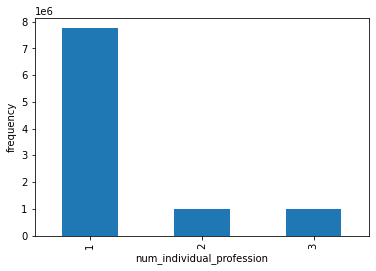

In [13]:
def name_basics_func0():
    primaryProfession = name_basics['primaryProfession'].dropna()
    name_basics['primaryProfession'] = name_basics['primaryProfession'].astype('str')
    num_individual_profession = name_basics['primaryProfession'].map(lambda x: len(x.split(',')))
    name_basics['num_individual_profession'] = num_individual_profession
    name_basics['num_individual_profession'].value_counts().plot(kind='bar')
    plt.xlabel('num_individual_profession')
    plt.ylabel('frequency')
    plt.show()
    new_name_basics0 = name_basics[['birthYear', 'num_individual_profession']]
    return new_name_basics0

new_name_basics0 = name_basics_func0()

In [23]:
! pip install apyori
from apyori import apriori

  Created wheel for apyori: filename=apyori-1.1.2-cp37-none-any.whl size=5975 sha256=2b8fa47fb54112c6c0a630b4bcc50cc2af3fc2083e29f2158c9a16661aa9b6ac
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


Calculate and plot the frequency of various occupations

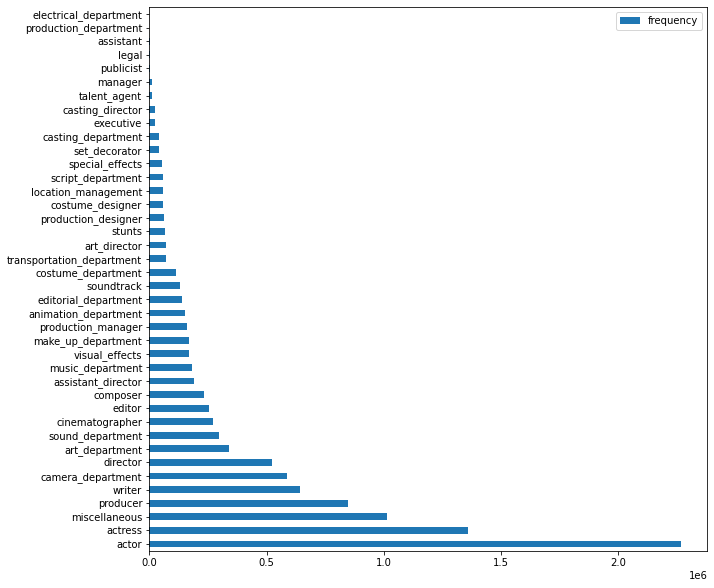

Aprior
RelationRecord(items=frozenset({'actor'}), support=0.29146703106806504, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'actor'}), confidence=0.29146703106806504, lift=1.0)])
RelationRecord(items=frozenset({'actress'}), support=0.17475387990800134, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'actress'}), confidence=0.17475387990800134, lift=1.0)])
RelationRecord(items=frozenset({'miscellaneous'}), support=0.1301110227651442, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'miscellaneous'}), confidence=0.1301110227651442, lift=1.0)])
RelationRecord(items=frozenset({'producer'}), support=0.1090734250988492, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'producer'}), confidence=0.1090734250988492, lift=1.0)])


In [24]:
def name_basics_func1():
    frequency_profession_dict = dict()
    for primaryProfession in name_basics['primaryProfession']:
        for pro in primaryProfession.split(','):
            if pro == 'nan':
                continue
            try:
                frequency_profession_dict[pro] += 1
            except KeyError:
                frequency_profession_dict[pro] = 1

    frequency_profession_df = pd.DataFrame(frequency_profession_dict.values(),
                                           index=frequency_profession_dict.keys(),
                                           columns=['frequency']).sort_values('frequency', ascending=False)
    frequency_profession_df.plot(kind='barh', figsize=(10, 10))
    plt.show()
    
    res = apriori(name_basics[name_basics['primaryProfession'] != 'nan']['primaryProfession'].map(lambda x: x.split(',')).values)
    print('Aprior')
    for rule in res:
        print(str(rule))
    return frequency_profession_df
    
    
frequency_profession_df = name_basics_func1()

An excellent work is usually translated into different languages by different channels and then sold in different regions. Table 'title_akas' has the feature 'region' for sale and the lack of feature 'language', so the feature 'language' can be ignored

First of all, we can get the total number of works

There are 4084539 works in total
On average, each work is available in 4.736 languages
The relationship between the number of language versions and frequency is shown in the figure below


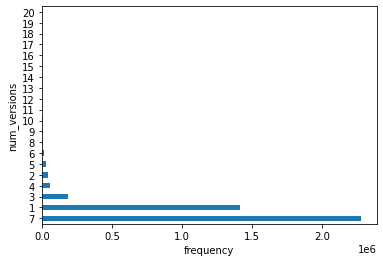

Which regions usually have translations?


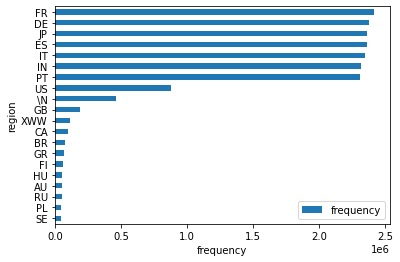

Top ten most widely disseminated works:


,frequency,Title
titleId,,
tt0168366,138,Poketto monsutâ
tt8185052,98,Mutant Virus
tt8052676,88,Superhero Landing
tt0076759,85,Star Wars
tt8187756,77,Game Over
tt8232202,76,Untitled Project
tt0060196,76,"Il buono, il brutto, il cattivo"
tt0080684,71,Star Wars: Episode V - The Empire Strikes Back
tt0057012,68,Dr. Strangelove or: How I Learned to Stop Worr...


Analysis of propagation paths using Aprior
Aprior
RelationRecord(items=frozenset({'imdbDisplay'}), support=0.47406192144256465, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'imdbDisplay'}), confidence=0.47406192144256465, lift=1.0)])
RelationRecord(items=frozenset({'original'}), support=0.3701891623332363, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'original'}), confidence=0.3701891623332363, lift=1.0)])


In [25]:
MIN_SUPP = 0.1
MIN_CONF = 0.1
MIN_LIFT = 0.1

def title_akas_func0():
    num_different_works = len(title_akas.titleId.unique())
    print('There are {} works in total'.format(num_different_works))
    print('On average, each work is available in {:.3f} languages'.format(len(title_akas) / num_different_works))
    title_akas['frequency'] = 0
    frequency_versions_df = title_akas[['titleId', 'frequency']].groupby('titleId').count()

    frequency_versions_df['frequency'].value_counts().iloc[:20].plot(kind='barh')
    plt.xlabel('frequency')
    plt.ylabel('num_versions')
    print('The relationship between the number of language versions and frequency is shown in the figure below')
    plt.show()

    title_akas[['region', 'frequency']].groupby('region').count().sort_values('frequency').iloc[-20:].plot(kind='barh')
    plt.xlabel('frequency')
    plt.ylabel('region')
    print('Which regions usually have translations?')
    plt.show()

    print('Top ten most widely disseminated works:')
    top10 = frequency_versions_df.sort_values('frequency', ascending=False)[: 10]
    originalTitle_top10 = list()
    for tt in top10.index:
        originalTitle_top10.append(
            title_akas[title_akas['titleId'] == tt].sort_values('isOriginalTitle', ascending=False).title.values[0])
    top10['Title'] = originalTitle_top10
    display(top10)
    
    frequency_versions_df.columns = ['num_akas']
    frequency_versions_df['tconst'] = frequency_versions_df.index
    frequency_versions_df = frequency_versions_df.reset_index()[['tconst', 'num_akas']]
    
    print('Analysis of propagation paths using Aprior')
    res = apriori(transactions=title_akas[title_akas['types'] != '\\N']['types'].map(lambda x: x.split(',')).values,
                  min_support=MIN_SUPP,
                  min_confidence=MIN_CONF,
                  min_lift=MIN_LIFT)
    print('Aprior')
    for rule in res:
        print(str(rule))
    return frequency_versions_df

new_title_akas = title_akas_func0()

In table title_basics, We can get more information about the genre, and we can also know the productivity of works in each era.

The following are the different kinds of quantities


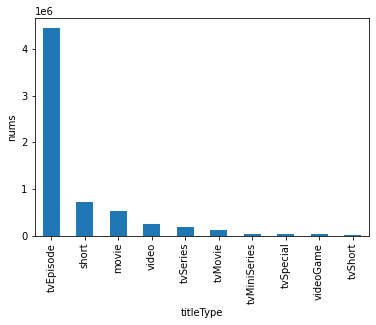

The earliest work was created in 1874, and the latest will be in 2115
From 1880 to 2020, the number of works per ten years is as follows:


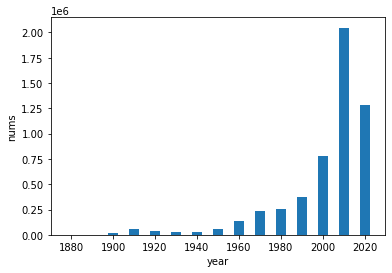

In [26]:
def title_basics_func0():
    title_basics['titleType'].value_counts().plot(kind='bar')
    plt.xlabel('titleType')
    plt.ylabel('nums')
    print('The following are the different kinds of quantities')
    plt.show()

    _title_basics = title_basics[title_basics['startYear'] != '\\N']
    _title_basics.loc[:, 'startYear'] = _title_basics.startYear.astype('int')
    earest_year = _title_basics.startYear.min()
    latest_year = _title_basics.startYear.max()
    print('The earliest work was created in {}, and the latest will be in {}'.format(earest_year, latest_year))

    print('From 1880 to 2020, the number of works per ten years is as follows:')
    years = np.arange(1880, 2021, 10)
    nums = [len(_title_basics[(year - 5) < _title_basics['startYear']][_title_basics['startYear'] < (year + 5)]) for year in years]
    plt.bar(years, nums, width=5)
    plt.xlabel('year')
    plt.ylabel('nums')
    plt.show()
    
    title_basics.loc[title_basics['runtimeMinutes'] == '\\N', 'runtimeMinutes'] = 0
    new_title_basics = title_basics[['tconst', 'startYear', 'runtimeMinutes']]
    return new_title_basics
    
new_title_basics = title_basics_func0()

table 'title_principals', We can get the number of principals and the responsibilities of the highest priority principals for each work

In [27]:
tconst_name_dict = name_basics[['nconst', 'primaryName']].set_index('nconst').to_dict()['primaryName']
nconst_title_dict = title_basics[['tconst', 'primaryTitle']].set_index('tconst').to_dict()['primaryTitle']
tconst_nconst_dict = dict()
for tconst, nconst in title_principals[['tconst', 'nconst']].values:
    print('\r{}'.format(len(tconst_nconst_dict)), end='')
    try:
        title = nconst_title_dict.get(tconst)
        if not title:
            continue
        name = tconst_name_dict.get(nconst)
        tconst_nconst_dict[title].append(name)
    except KeyError:
        tconst_nconst_dict[title] = [name]

2902686

Frequency Statistic

In [28]:
for i in range(10):
    print(i + 1)
    print(list(tconst_nconst_dict.keys())[i])
    print(list(tconst_nconst_dict.values())[i])

print('...')
print('A total of {} pieces of valid data'.format(len(tconst_nconst_dict)))

1
Carmencita
['Carmencita', 'William K.L. Dickson', 'William Heise', 'Oskar Messter']
2
Le clown et ses chiens
['Émile Reynaud', 'Gaston Paulin']
3
Pauvre Pierrot
['Émile Reynaud', 'Julien Pappé', 'Gaston Paulin', 'Tamara Pappé']
4
Un bon bock
['Émile Reynaud', 'Gaston Paulin']
5
Blacksmith Scene
['Charles Kayser', 'John Ott', 'William K.L. Dickson', 'Thomas A. Edison', 'Louis Lumière']
6
Chinese Opium Den
['William K.L. Dickson']
7
Corbett and Courtney Before the Kinetograph
['James J. Corbett', 'Peter Courtney', 'William K.L. Dickson', 'William Heise', 'Thomas A. Edison']
8
Edison Kinetoscopic Record of a Sneeze
['Fred Ott', 'William K.L. Dickson', 'William Heise']
9
Miss Jerry
['Blanche Bayliss', 'William Courtenay', 'Chauncey Depew', 'Alexander Black']
10
Exiting the Factory
['Louis Lumière']
...
A total of 2902686 pieces of valid data


In [29]:
nconst_dict = dict()
for nconst in title_principals['nconst'].values:
    try:
        nconst_dict[nconst] += 1
    except KeyError:
        nconst_dict[nconst] = 1

In [30]:
nconst_df = pd.DataFrame()
nconst_df['nconst'] = nconst_dict.keys()
nconst_df['frequency'] = nconst_dict.values()

In [31]:
print('The ten most frequently appearing actors are as follows:')
i = 0
for nconst in nconst_df.sort_values('frequency', ascending=False).nconst.values:
    profession = name_basics[name_basics['nconst'] == nconst].primaryProfession.item()
    if ('actor' in profession) or ('actress' in profession):
        i += 1
        name = name_basics[name_basics['nconst'] == nconst].primaryName.item()
        freq = nconst_df[nconst_df['nconst'] == nconst].frequency.item()
        print('Rank: {}, Name: {}. Freq: {} times'.format(i, name, freq))
        if i == 10:
            break

The ten most frequently appearing actors are as follows:
Rank: 1, Name: Tony Warren. Freq: 9892 times
Rank: 2, Name: Johnny Gilbert. Freq: 8536 times
Rank: 3, Name: Ernesto Alonso. Freq: 8415 times
Rank: 4, Name: Delia Fiallo. Freq: 8408 times
Rank: 5, Name: Alex Trebek. Freq: 8022 times
Rank: 6, Name: Lee Phillip Bell. Freq: 7482 times
Rank: 7, Name: Henrique Martins. Freq: 7182 times
Rank: 8, Name: Pat Sajak. Freq: 7079 times
Rank: 9, Name: Bob Barker. Freq: 7004 times
Rank: 10, Name: Johnny Olson. Freq: 6945 times


Among them, the largest number of actors


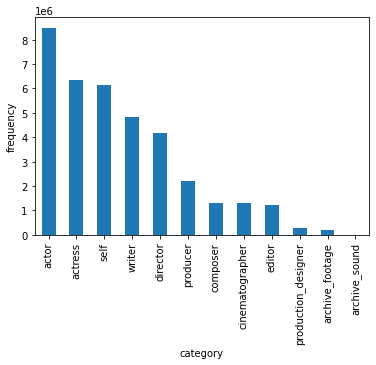

On average, there are 6.391414072431944 principals in charge of each work
The most occurring situation is that there are 10 principals


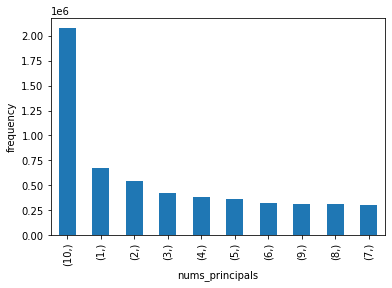

In [32]:
MIN_SUPP = 0.01
MIN_CONF = 0.01
MIN_LIFT = 0.01
def title_principals_func0():
    title_principals['category'].value_counts().plot(kind='bar')
    plt.xlabel('category')
    plt.ylabel('frequency')
    print('Among them, the largest number of actors')
    plt.show()
    title_principals['nums_principals'] = 1
    new_title_principals = title_principals[['tconst', 'nums_principals']].groupby('tconst').count()
    print('On average, there are {} principals in charge of each work'.format(len(title_principals) / len(new_title_principals)))
    
    new_title_principals.value_counts().plot(kind='bar')
    plt.ylabel('frequency')
    print('The most occurring situation is that there are 10 principals')
    plt.show()
    
    new_title_principals.reset_index(inplace=True)
    
#     tconst_nconst_dict = dict()
#     for tconst, nconst in title_principals[['tconst', 'nconst']].values:
#         try:
#             tconst_nconst_dict[tconst].append(nconst)
#         except KeyError:
#             tconst_nconst_dict[tconst] = [nconst]

#     print('Use Aprior to calculate the most frequently appearing people')
#     res = apriori(transactions=tconst_nconst_dict.values(),
#                   min_support=MIN_SUPP,
#                   min_confidence=MIN_CONF,
#                   min_lift=MIN_LIFT)
#     print('Aprior')
#     for rule in res:
#         print(str(rule))
        
    return new_title_principals

new_title_principals = title_principals_func0()

In the table 'title_rating', we can see the scores and votes of different works

The average score for all works is 7.1, and the average number of votes cast is 76 votes
But at this time we will find that only a few of the works have a lot of attention


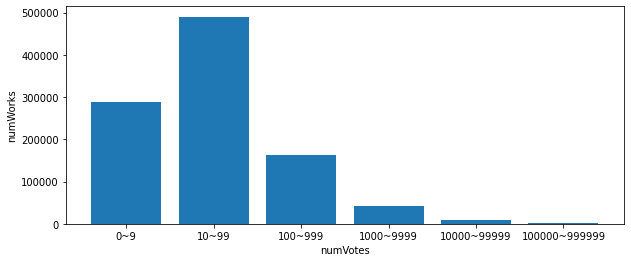

However there is no direct relationship between the number of voters and the score


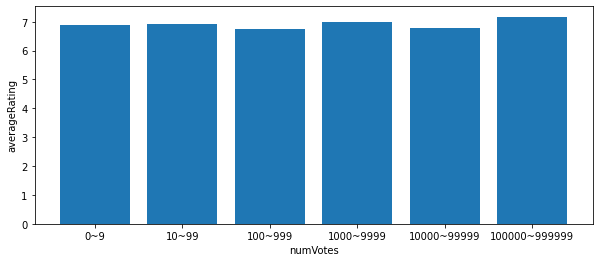

In [33]:
def title_rating_func0():
    print('The average score for all works is 7.1, and the average number of votes cast is 76 votes')
    title_rating.describe()

    plt.figure(figsize=(10, 4))
    plt.bar(['0~9', '10~99', '100~999', '1000~9999', '10000~99999', '100000~999999'], 
            [
                len(title_rating[
                    title_rating['numVotes'] >= 0][title_rating['numVotes'] < 1e1]),
                len(title_rating[
                    title_rating['numVotes'] >= 1e1][title_rating['numVotes'] < 1e2]),
                len(title_rating[
                    title_rating['numVotes'] >= 1e2][title_rating['numVotes'] < 1e3]),
                len(title_rating[
                    title_rating['numVotes'] >= 1e3][title_rating['numVotes'] < 1e4]),
                len(title_rating[
                    title_rating['numVotes'] >= 1e4][title_rating['numVotes'] < 1e5]),
                len(title_rating[
                    title_rating['numVotes'] >= 1e5][title_rating['numVotes'] < 1e6]),
            ]
           )
    plt.xlabel('numVotes')
    plt.ylabel('numWorks')
    print('But at this time we will find that only a few of the works have a lot of attention')
    plt.show()

    plt.figure(figsize=(10, 4))
    plt.bar(['0~9', '10~99', '100~999', '1000~9999', '10000~99999', '100000~999999'], 
            [
                title_rating[title_rating[
                    'numVotes'] >= 0][title_rating['numVotes'] < 1e1].averageRating.mean(),
                title_rating[title_rating[
                    'numVotes'] >= 1e1][title_rating['numVotes'] < 1e2].averageRating.mean(),
                title_rating[title_rating[
                    'numVotes'] >= 1e2][title_rating['numVotes'] < 1e3].averageRating.mean(),
                title_rating[title_rating[
                    'numVotes'] >= 1e3][title_rating['numVotes'] < 1e4].averageRating.mean(),
                title_rating[title_rating[
                    'numVotes'] >= 1e4][title_rating['numVotes'] < 1e5].averageRating.mean(),
                title_rating[title_rating[
                    'numVotes'] >= 1e5][title_rating['numVotes'] < 1e6].averageRating.mean(),
            ]
           )
    plt.xlabel('numVotes')
    plt.ylabel('averageRating')
    print('However there is no direct relationship between the number of voters and the score')
    plt.show()
    
title_rating_func0()

In [34]:
title_rating = pd.merge(left=title_rating, right=new_title_akas, how='left', on='tconst')
title_rating = pd.merge(left=title_rating, right=new_title_basics, how='left', on='tconst')
title_rating = pd.merge(left=title_rating, right=new_title_principals, how='left', on='tconst')

In [35]:
title_rating.loc[title_rating['num_akas'].isnull(), 'num_akas'] = 0
title_rating.loc[title_rating['nums_principals'].isnull(), 'nums_principals'] = 0

In [36]:
def minmaxscaler(data):
    min = np.amin(data)
    max = np.amax(data)    
    return (data - min)/(max-min)

In [37]:
title_rating

,tconst,averageRating,numVotes,num_akas,startYear,runtimeMinutes,nums_principals
0,tt0000001,5.6,1550,5.0,1894,1,3.0
1,tt0000002,6.1,186,6.0,1892,5,2.0
2,tt0000003,6.5,1207,6.0,1892,4,4.0
3,tt0000004,6.2,113,6.0,1892,0,2.0
4,tt0000005,6.1,1934,9.0,1893,1,4.0
...,...,...,...,...,...,...,...
993816,tt9916576,5.9,7,0.0,2019,85,2.0
993817,tt9916578,9.1,11,0.0,2019,0,10.0
993818,tt9916720,5.1,41,13.0,2019,10,7.0
993819,tt9916766,6.7,11,7.0,2019,43,10.0


In [38]:
minmaxscaler(title_rating[['averageRating', 'numVotes', 'num_akas', 'startYear', 'runtimeMinutes' ,'nums_principals']]).corr()

,averageRating,numVotes,num_akas,nums_principals
averageRating,1.000000,0.013370,-0.124740,-0.006211
numVotes,0.013370,1.000000,0.363062,0.033773
num_akas,-0.124740,0.363062,1.000000,0.125222
nums_principals,-0.006211,0.033773,0.125222,1.000000
